![alt text](https://storage.googleapis.com/kaggle-datasets-images/106/233/165d67c1a351357858c660d673085e13/dataset-original.jpg)

##Description

EEG signal data from 10 college students while they watched MOOC video clips. Data is extracted from online education videos that are assumed not to be confusing for college students, such as videos of the introduction of basic algebra or geometry. Along with it videos that are expected to confuse a typical college student if a student is not familiar with the video topics like Quantum Mechanics, and Stem Cell Research were also prepared. A total of 20 videos, 10 in each category. Each video was about 2 minutes long. The two-minute clip in the middle of a topic is chopped to make the videos more confusing.
The students wore a single-channel wireless MindSet that measured activity over the frontal lobe. The MindSet measures the voltage between an electrode resting on the forehead and two electrodes (one ground and one reference) each in contact with an ear.
After each session, the student rated his/her confusion level on a scale of 1-7, where one corresponded to the least confusing and seven corresponded to the most confusing. These labels if further normalized into labels of whether the students are confused or not. This label is offered as self-labelled confusion in addition to our predefined label of confusion.

## Challenge
In order to find correct decison we need to analyze signal data which might contain some distortion while data collection 

## Data preparation
Contains 2 files

EEG_data.csv: Contains the EEG data recorded from 10 students

demographic_info.csv: Contains demographic information for each student

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
seed = 123

plt.style.use('fivethirtyeight')
import os
print(os.listdir("../content"))

['.config', 'demographic_info.csv', 'videos', 'confused-eeg.zip', 'EEG_data.csv', 'sample_data']


In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.129 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-data-sets/106/24522/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1589084980&Signature=q1tShl5fEwTNRvN8hMHpp2PjXANzVoxTayC7HBAxk00Ilwmb1vBn5m2i4EZ2onKYwbn3GHTB0euOQ3%2BSv%2FQep%2FWwb90RWkyqgR%2BGY4fQoNLhH8qq3NR6yE5k1FGK4Fp6wuohlu0NM2xRrWa8i%2FGGv0Cst4Xh%2FnTnrN%2BCwEltko8gAPi0iy5O14FUk2qBuE3X91Pfl6q3GsFfu7v3QGF5vf%2F9SbTIpEXCgvCNzTAU%2Bd29k5Y%2F28nwSbq%2BfCjhQ5KaIU4QPwv7I%2FEYCfXQm%2FPPlrU8uDXHDr%2BBiPCY9VDBxCNSyVcbwgqXZ4W5UdsR%2F6ssWGg4i%2Bh3W3B9nxyANs6xEQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dconfused-eeg.zip" -c -O 'confused-eeg.zip'

--2020-05-08 20:27:39--  https://storage.googleapis.com/kaggle-data-sets/106/24522/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1589084980&Signature=q1tShl5fEwTNRvN8hMHpp2PjXANzVoxTayC7HBAxk00Ilwmb1vBn5m2i4EZ2onKYwbn3GHTB0euOQ3%2BSv%2FQep%2FWwb90RWkyqgR%2BGY4fQoNLhH8qq3NR6yE5k1FGK4Fp6wuohlu0NM2xRrWa8i%2FGGv0Cst4Xh%2FnTnrN%2BCwEltko8gAPi0iy5O14FUk2qBuE3X91Pfl6q3GsFfu7v3QGF5vf%2F9SbTIpEXCgvCNzTAU%2Bd29k5Y%2F28nwSbq%2BfCjhQ5KaIU4QPwv7I%2FEYCfXQm%2FPPlrU8uDXHDr%2BBiPCY9VDBxCNSyVcbwgqXZ4W5UdsR%2F6ssWGg4i%2Bh3W3B9nxyANs6xEQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dconfused-eeg.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.



In [0]:
!unzip confused-eeg.zip

Archive:  confused-eeg.zip
replace EEG_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: EEG_data.csv            
replace demographic_info.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: demographic_info.csv    
replace videos/0.m4v? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: videos/0.m4v            
replace videos/1.m4v? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: videos/1.m4v            
replace videos/2.m4v? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: videos/2.m4v            
replace videos/3.m4v? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: videos/3.m4v            
replace videos/4.m4v? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: videos/4.m4v            
replace videos/5.m4v? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: videos/5.m4v            
replace videos/6.m4v? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: videos/6.m4v            
replace videos/7.m4v? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  i

#Analyze demographic and egg data

In [0]:
demographic_data = pd.read_csv('../content/demographic_info.csv')

In [0]:
demographic_data.head(2)

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M


In [0]:
eeg_data = pd.read_csv('../content/EEG_data.csv')

In [0]:
eeg_data.head(3)

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0


## Perform data type conversion for categorical variables

In [0]:
eeg_data['SubjectID'] = eeg_data['SubjectID'].astype(int)
eeg_data['VideoID'] = eeg_data['VideoID'].astype(int)
eeg_data['predefinedlabel'] = eeg_data['predefinedlabel'].astype(int)
eeg_data['user-definedlabeln'] = eeg_data['user-definedlabeln'].astype(int)

In [0]:
eeg_data.iloc[:, 2:].describe()

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
count,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000,12811.000000
mean,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,3.814433e+04,2.959255e+04,1.441597e+04,0.479978,0.512606
std,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,7.906606e+04,7.982637e+04,3.603523e+04,0.499618,0.499861
min,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000,0.000000
25%,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,7.358500e+03,4.058000e+03,2.167500e+03,0.000000,0.000000
50%,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,1.581000e+04,9.763000e+03,5.116000e+03,0.000000,1.000000
75%,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,3.549400e+04,2.488800e+04,1.266950e+04,1.000000,1.000000
max,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,1.645369e+06,1.972506e+06,1.348117e+06,1.000000,1.000000


## Target Value distribution

In [0]:
eeg_data['user-definedlabeln'].value_counts()

1    6567
0    6244
Name: user-definedlabeln, dtype: int64

In [0]:
eeg_data.head(2)

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0,0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0,0
1,0,0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0,0


In [0]:
resume_data = eeg_data.groupby(['SubjectID', 'VideoID'])['user-definedlabeln'].agg(lambda x: sum(x) > 0).unstack("VideoID")
resume_data

VideoID,0,1,2,3,4,5,6,7,8,9
SubjectID,,,,,,,,,,
0,False,True,True,False,False,True,True,False,True,False
1,False,True,True,True,True,False,False,False,False,False
2,False,True,False,False,True,True,False,True,True,False
3,False,False,False,False,True,False,True,True,True,True
4,False,True,True,True,False,False,True,True,True,False
5,False,True,True,True,False,True,True,False,True,False
6,True,False,False,True,True,False,True,False,True,False
7,True,True,False,True,True,True,False,True,False,False
8,False,False,False,False,True,True,False,False,True,True


## Data Distribution across video and Subjects


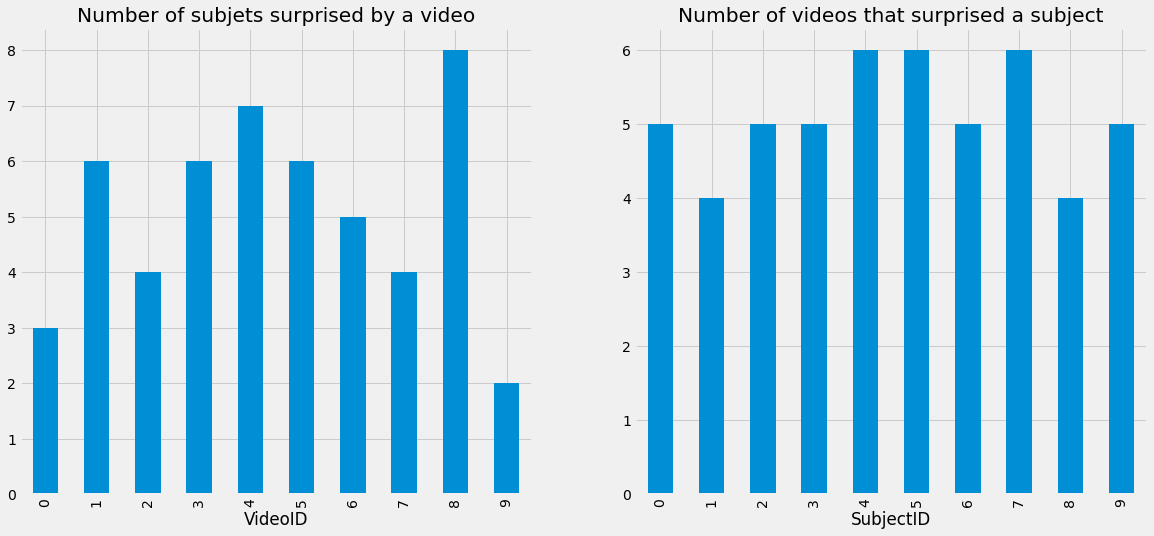

In [0]:
fig = plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
resume_data.apply(sum).plot(kind='bar', title='Number of subjets surprised by a video')
plt.subplot(1, 2, 2)
resume_data.apply(sum, axis=1).plot(kind='bar', title="Number of videos that surprised a subject")
plt.show()

It looks like that VideoID #8 is the one that most confusion generates. Users #4, #5, #7 are the most confused ones.


Let's see the time serie for a user and a video:

In [0]:
features = ['Attention', 'Mediation', 'Raw', 'Delta',
            'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']

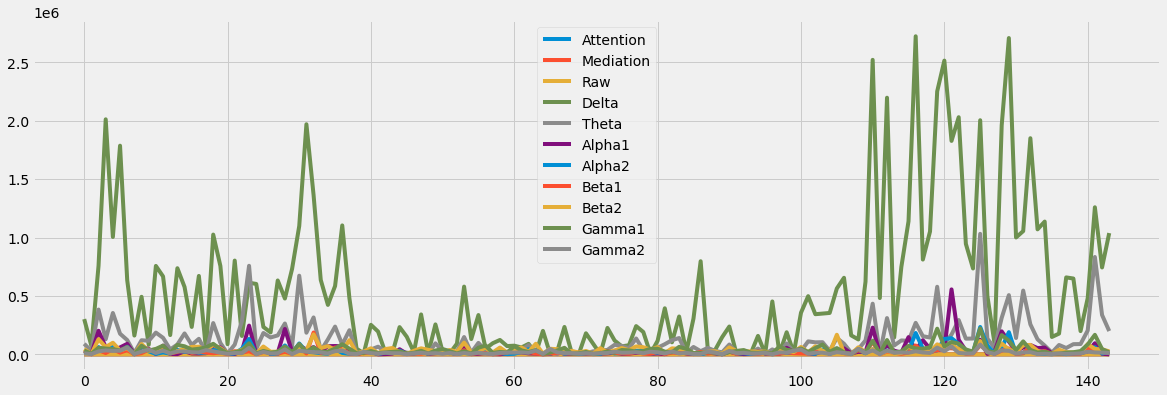

In [0]:
user1_video1_data[features].plot(figsize=(18,6))
plt.show()

This person doesn't feel confused at any time of the video:



In [0]:
(user1_video1_data['user-definedlabeln']!=0).sum()

0


As only 1 minute of each video was shown to each person, and sampling rate was 0.5 records per second, each person/video should have 60*2=120 rows. 
The reality is that there are slightly differences. Even for the same video, the number of records change from person to person:*

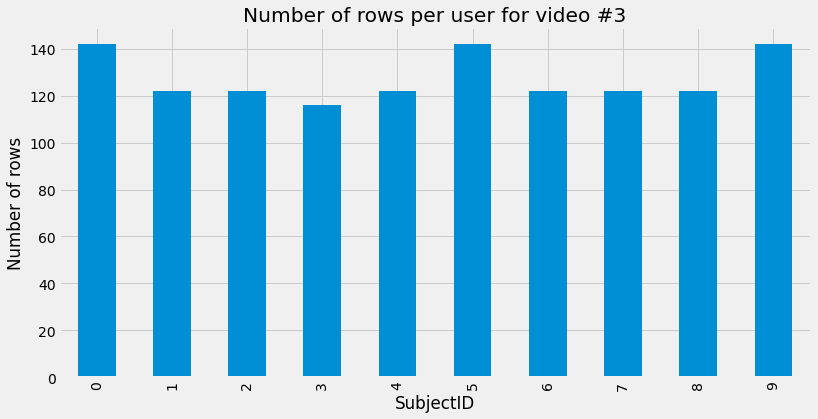

In [0]:
eeg_data.groupby(['SubjectID', 'VideoID']).size().loc[(slice(None), 2)].plot(kind='bar', figsize=(12,6))
plt.title("Number of rows per user for video #3")
plt.ylabel("Number of rows")
plt.show()

no missing values


## Correlation across Variables

In [0]:
corr = data[features].corr()
corr

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
Attention,1.000000,0.162696,-0.008388,-0.237335,-0.272586,-0.187214,-0.156197,-0.125265,0.018580,-0.074249,-0.040691
Mediation,0.162696,1.000000,0.016321,-0.088904,-0.168171,0.065489,0.044051,-0.049912,-0.089450,-0.074629,-0.094584
Raw,-0.008388,0.016321,1.000000,-0.008388,-0.003858,-0.014944,-0.011935,-0.044504,-0.018658,-0.011208,-0.023205
Delta,-0.237335,-0.088904,-0.008388,1.000000,0.485276,0.434420,0.415134,0.410677,0.385174,0.392043,0.310033
Theta,-0.272586,-0.168171,-0.003858,0.485276,1.000000,0.600374,0.584821,0.597776,0.491882,0.486883,0.415539
Alpha1,-0.187214,0.065489,-0.014944,0.434420,0.600374,1.000000,0.557952,0.561410,0.461468,0.485648,0.376634
Alpha2,-0.156197,0.044051,-0.011935,0.415134,0.584821,0.557952,1.000000,0.589906,0.557673,0.532398,0.365821
Beta1,-0.125265,-0.049912,-0.044504,0.410677,0.597776,0.561410,0.589906,1.000000,0.464235,0.492587,0.486344
Beta2,0.018580,-0.089450,-0.018658,0.385174,0.491882,0.461468,0.557673,0.464235,1.000000,0.562465,0.422500
Gamma1,-0.074249,-0.074629,-0.011208,0.392043,0.486883,0.485648,0.532398,0.492587,0.562465,1.000000,0.645948


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


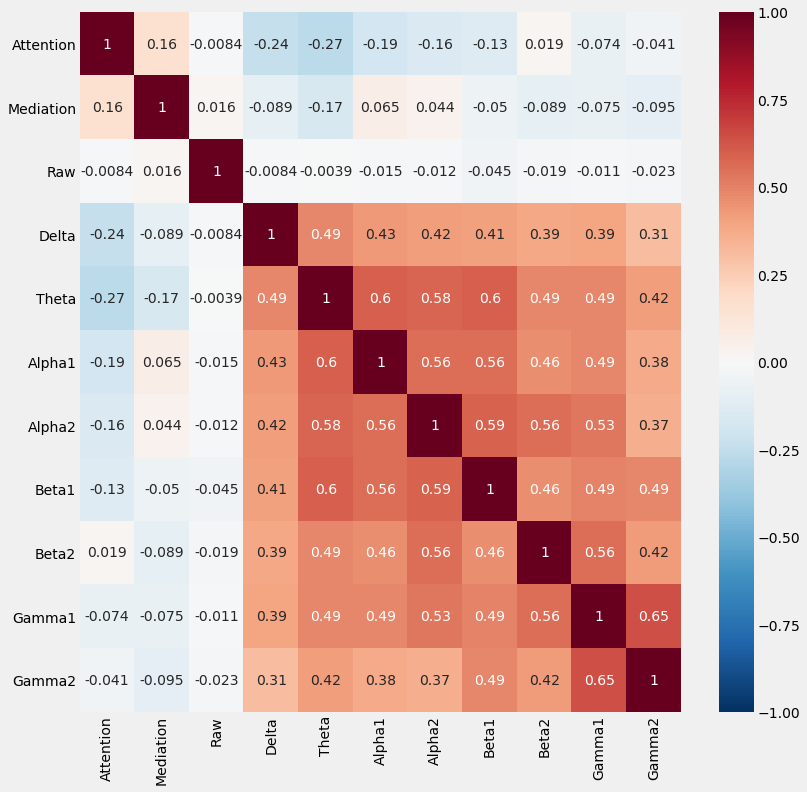

In [0]:
import seaborn as sns
plt.figure(figsize = (12, 12))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap="RdBu_r")
plt.show()

As it is clear that there are high correlation between some variables, we could try later to do some feature selection and dimension reduction to see if some models achieve better results this way.

## Models


In [0]:
data.head(2)

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0,0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0,0
1,0,0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0,0


In [0]:
X = data[features]
y = data['user-definedlabeln']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X), y, test_size=0.2, random_state=42)

In [0]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=seed)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              silent=None, subsample=1, verbosity=1)

In [0]:
demographic_data.columns = ['subject ID', 'age', 'ethnicity', 'gender']

In [0]:
extended_data = data.merge(demographic_data, left_on="SubjectID", right_on="subject ID")
extended_data.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,subject ID,age,ethnicity,gender
0,0,0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0,0,0,25,Han Chinese,M
1,0,0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0,0,0,25,Han Chinese,M
2,0,0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0,0,0,25,Han Chinese,M
3,0,0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0,0,0,25,Han Chinese,M
4,0,0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0,0,0,25,Han Chinese,M


In [0]:
extended_data['ethnicity'] = extended_data['ethnicity'].astype("category").cat.codes
extended_data['gender'] = extended_data['gender'].astype("category").cat.codes
features_extra = features + ['age', 'ethnicity', 'gender']

In [0]:
data_dmatrix = xgb.DMatrix(data=extended_data[features_extra].values, label=y.values)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":5, "eta":0.1, "n_estimators":1000, "colsample_bytree": 0.7, "learning_rate": 0.1}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=5, metrics="error", as_pandas=True, seed=seed)

# Print the accuracy
print("Test Accuracy: {:.5f}".format(((1-cv_results["test-error-mean"]).iloc[-1])))

Test Accuracy: 0.65361
